In [136]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# import the dataset to train and evaluate the model
df = [] #for PCA features
df.append(pd.read_csv(r"our_input_30/global_pca4.csv"))
# df.append(pd.read_csv(r"our_input_subject2/global_pca4.csv"))
for dfs in df:
    dfs.columns = list(range(len(dfs.columns)))
df= pd.concat([dfs for dfs in df], axis=0).reset_index(drop=True)

In [138]:
# import the new dataset we want to apply the classifier on
df_mix=[]
df_mix.append(pd.read_csv(r"our_input_30/mix_pca4.csv",header=None))
# df_mix.append(pd.read_csv(r"our_input_subject2/mix_pca4.csv",header=None))
for dfs in df_mix:
    dfs.columns = list(range(len(dfs.columns)))
df_mix= pd.concat(df_mix, axis=0).reset_index(drop=True)

In [139]:
# extraction for features 3PC
X = df.drop(4,axis=1)
y = df.iloc[:, 4]              # output required

#extraction for mixed serie
X_mix = df_mix.drop(4,axis=1)
y_mix = df_mix.iloc[:, 4]              # output required


In [140]:
X_mix

,0,1,2,3
0,7.236482,7.837987,-2.544959,0.855015
1,0.342263,-1.156940,0.206681,-0.726286
2,-1.175458,-0.470343,0.175858,-0.644520
3,2.618751,0.632633,-0.371467,-0.590884
4,-3.536459,-0.161098,0.348850,-0.414718
5,-3.780393,0.412498,0.198781,-0.524865
6,-5.938291,0.242368,0.441883,-0.094232
7,-4.774081,0.575079,0.243058,-0.324052
8,-1.374497,0.640404,-0.052678,-0.588431
9,-0.090574,0.483983,-0.163971,-0.492182


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [142]:
X_train

,0,1,2,3
3,4.861231,0.699904,-0.108950,-0.013451
53,-1.220867,-1.032412,0.307223,0.190670
17,0.635896,0.487218,-0.592451,-0.319876
8,0.955759,1.310233,-0.964321,-0.558958
6,3.175753,1.326470,-0.736129,-0.316096
41,-3.346736,-0.360612,-0.223404,0.127946
4,6.322312,0.452986,0.272581,0.513936
44,-2.977713,-1.311809,0.237297,0.060686
19,5.680658,-1.130014,1.534226,0.835266
47,-2.303013,-0.891259,-0.041188,0.141205


In [143]:
y_train

3     0.0
53    1.0
17    0.0
8     0.0
6     0.0
41    1.0
4     0.0
44    1.0
19    0.0
47    1.0
52    1.0
25    0.0
57    1.0
15    0.0
58    1.0
27    0.0
9     0.0
30    1.0
36    1.0
26    0.0
24    0.0
43    1.0
11    0.0
32    1.0
54    1.0
56    1.0
37    1.0
29    1.0
45    1.0
1     0.0
21    0.0
2     0.0
48    1.0
39    1.0
35    1.0
23    0.0
50    1.0
10    0.0
22    0.0
18    0.0
60    1.0
20    0.0
7     0.0
42    1.0
14    0.0
28    0.0
51    1.0
38    1.0
Name: 4, dtype: float64

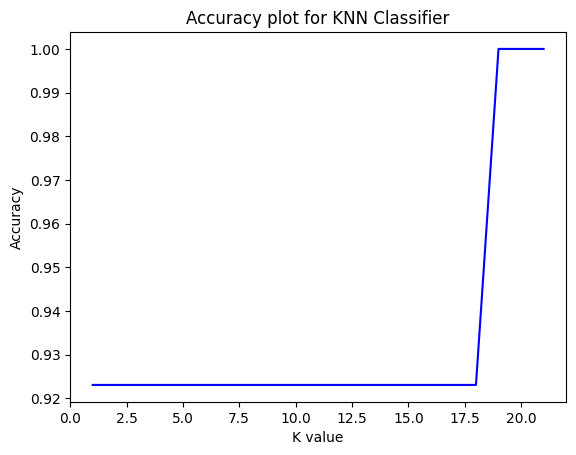

In [144]:
from sklearn.neighbors import KNeighborsClassifier # applying KNN for classification
k_value = [] 
k_accuracy = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    score = knn.score(X_test,y_test)
    k_value.append(i)
    k_accuracy.append(score)
# for i,j in zip(k_value,k_accuracy):
    # print(i,j)

#Finding k for max acc
plt.plot(range(1,22),k_accuracy,color = "blue")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for KNN Classifier")
plt.show()

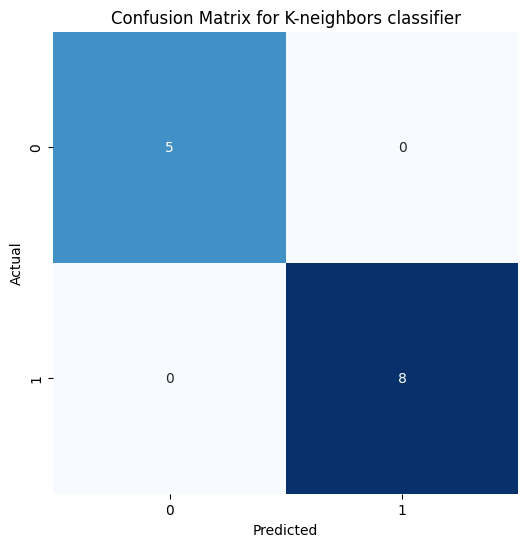

In [145]:
from sklearn.metrics import confusion_matrix
# y_pred = np.array(list(map(lambda x: np.argmax(x), knn.predict(X_test))))
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K-neighbors classifier")
plt.show()


In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [147]:
from sklearn.ensemble import RandomForestClassifier  # applying random forest for classification
from sklearn.metrics import accuracy_score
rf_params = None

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
accuracy_score(y_test,y_pred)

0.9230769230769231

In [148]:
# predict the mix movement serie with RF
y_pred_mix = rf.predict(X_mix)
print(y_pred_mix)
accuracy_score(y_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_mix,y_pred_mix))
df.to_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_codes\our_input_subject2\results_pca4.csv", index=False, header=False)

[0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0.]
0.6129032258064516


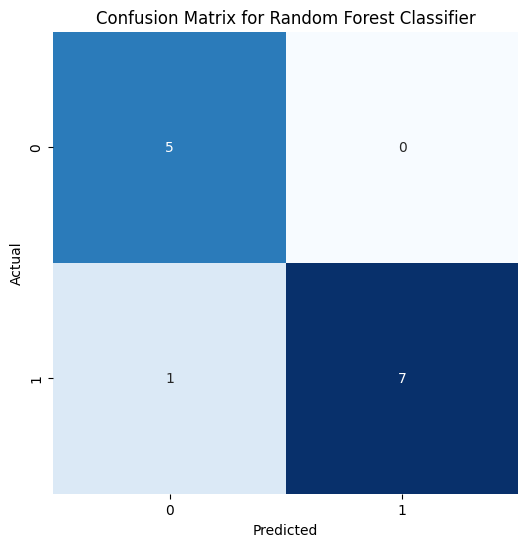

In [149]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.88      0.93         8

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.92        13



In [151]:
from catboost import CatBoostClassifier  # applying cat boost for classification

cat=CatBoostClassifier(silent=True).fit(X_train,y_train)

y_pred=cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)
accuracy_score(y_test,y_pred)

0.9230769230769231

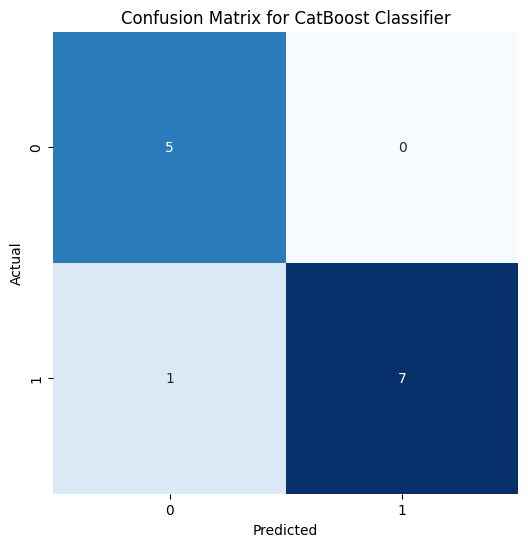

In [152]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CatBoost Classifier")
plt.show()


In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.88      0.93         8

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.92        13



In [154]:
# predict the mix movement serie with CatBoost
y_pred_mix = cat.predict(X_mix)
print(y_pred_mix)
accuracy_score(y_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_mix,y_pred_mix))
df.to_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_codes\our_input_subject2\results_pca4.csv", index=False, header=False)

[0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0.]
0.6129032258064516
